In [1]:
import numpy as np
import pprint 
import pandas as pd
from collections import deque
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.metrics import precision_recall_fscore_support as score
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
import pydotplus

# Define root data path
DATA_ROOT = './data/'

# Thresholds for the missing values in test and train dataset
TRAIN_NAN_THR = 500
TEST_NAN_THR = 40

# A function to separate the different outputs of each section.
# This will be used to display the data in the terminal in a readable way.
def separate_output(str):
    '''
        Displays an string as an argument in a clear form
    '''
    SHARP_COUNT = 100
    print('\n')
    for i in range(SHARP_COUNT):
        if(i == SHARP_COUNT-1):
            print("#")
        else:
            print("#", end="")

    # Display info at the center
    for i in range(int((SHARP_COUNT/2-len(str)/2))):
        print("",end=" ")

    print(str)

    for i in range(SHARP_COUNT):
        print("#", end="")
    print('\n')

# This function computes the number of missing values of each column in descending order 
def compute_nans(df):
    '''
        returns a dictionary consisting of column names and the number of NaNs in each column
    '''

    nans_dict = {}

    for col in df:
        nan_col_counter = 0
        for row in df[col]:
            if(row == '?'):
                nan_col_counter += 1
        nans_dict[str(col)] = nan_col_counter

    return nans_dict

# This function converts the object types to numeric types
def obj_to_num(df):
    '''
        returns a new dataframe with all object types converted to numeric type
    '''
    
    for column in df.columns:
        if(df[column].dtype == 'object'):
            df[column] = df[column].astype('category')
            df[column] = df[column].cat.codes
    
    return df

# Load data
train_data = pd.read_csv(DATA_ROOT + 'train.csv')
test_data = pd.read_csv(DATA_ROOT + 'test.csv')

# Generate column names
TRAIN_COLUMN_NAMES = ['col_' + str(i+1) for i in range(train_data.shape[1])]
TEST_COLUMN_NAMES = ['col_' + str(i+1) for i in range(test_data.shape[1])]

# Rename dataframe columns
train_data.columns = TRAIN_COLUMN_NAMES
test_data.columns = TEST_COLUMN_NAMES

# Get datatypes
separate_output('Training Data Types')
print(train_data.dtypes)

# Describe the data
separate_output('Statistical Information')
print(train_data.describe())

separate_output('Number of Classes in Train Data')
print(train_data['col_39'].value_counts())

# Get the number of missing values in a descending order
train_nan_cols = compute_nans(train_data)
test_nan_cols = compute_nans(test_data)
separate_output('NaNs in Train Columns')
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(train_nan_cols)
separate_output('NaNs in Test Columns')
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(test_nan_cols)

# Drop the columns with more than 500 missing values
separate_output('Train Columns After Drop')
separate_output('Test Columns Columns After Drop')
train_cols_to_drop = [key for key, value in train_nan_cols.items() if value > TRAIN_NAN_THR]
test_cols_to_drop = [key for key, value in test_nan_cols.items() if value > TEST_NAN_THR]
train_data = train_data.drop(train_cols_to_drop, axis=1)
test_data = test_data.drop(test_cols_to_drop, axis=1)

# Fill in the missing values of column 8 using its average
separate_output('Data with Filled Missing Values in Float Dtypes')
train_data = train_data.replace('?', np.NaN)            # Fix non standard missing values
test_data = test_data.replace('?', np.NaN)
train_data.col_8 = train_data.col_8.astype(float)       # Mean does not work for int
test_data.col_8 = test_data.col_8.astype(float)

separate_output("TRAIN DATA")
print(train_data.dtypes)
separate_output("TEST DATA")
print(test_data.dtypes)

train_data['col_8'].fillna(train_data['col_8'].mean(), inplace=True)
test_data['col_8'].fillna(test_data['col_8'].mean(), inplace=True)

# Bring out the training labels before anything stupid happens
separate_output('Separated Training Labels')
train_labels = train_data['col_39']
# test_labels = test_data['col_39'] -> We don't have the labels :D
train_data = train_data.drop(['col_39'], axis=1)
# test_data = test_data.drop(['col_39'], axis=1)    -> We don't have the labels

# Convert the categorical data to the numeric form
# Select the columns with object type
separate_output('Converted Data to Numeric Format')
train_data = obj_to_num(train_data)
test_data = obj_to_num(test_data)

# Standardize the data using Standard Scaler
# Standardize the data along each column
separate_output('Standardized Train Data')
train_data = StandardScaler().fit_transform(train_data)
test_data = StandardScaler().fit_transform(test_data)

# Export the tree graph
# dot_data = StringIO()
# export_graphviz(decision_tree, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

# Find the accuracy and recall of the prediction
separate_output("Evaluation Results")
# train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.2)

# # Dimensionality Reduction with PCA
# # pca = PCA(n_components=6)   # Since we have 6 classes
# # pca.fit(train_data)         # fit pca on train data

# # # # Apply transformation on both test and train data
# # train_data = pca.transform(train_data)
# # test_data = pca.transform(test_data)

# # Training a decision tree model
# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(train_data, train_labels)

# prediction = decision_tree.predict(test_data)
# precision, recall, fscore, support = score(test_labels, prediction)
# classes = []
# [classes.append(x) for x in test_labels if x not in classes]
# for i in range(0, len(classes)):
#     print('\nClass ', classes[i])
#     print('     precision = {prec:4.2f}%'.format(prec=precision[i]*100))
#     print('     recall = {rc:4.2f}%'.format(rc=recall[i]*100))
#     print('     fscore = {fsc:4.2f}%'.format(fsc=fscore[i]*100))


separate_output('Decision Tree Parameters')
param_grid = {
    'max_depth': np.arange(3, 10),
    'splitter': ['random', 'best'],
    'max_features': ['log2', 'sqrt', 'auto'],
}
NUM_FOLDS = 5
# decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=NUM_FOLDS)
decision_tree = DecisionTreeClassifier(max_depth=9, max_features='log2', splitter='best')
decision_tree.fit(train_data, train_labels)



####################################################################################################
                                        Training Data Types
####################################################################################################

col_1      object
col_2      object
col_3      object
col_4       int64
col_5       int64
col_6      object
col_7      object
col_8      object
col_9       int64
col_10     object
col_11     object
col_12     object
col_13     object
col_14     object
col_15     object
col_16     object
col_17     object
col_18     object
col_19     object
col_20     object
col_21     object
col_22     object
col_23     object
col_24     object
col_25     object
col_26     object
col_27     object
col_28     object
col_29     object
col_30     object
col_31     object
col_32     object
col_33    float64
col_34    float64
col_35      int64
col_36     object
col_37      int64
col_38     object
col_39     object
dtype: object


#################

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

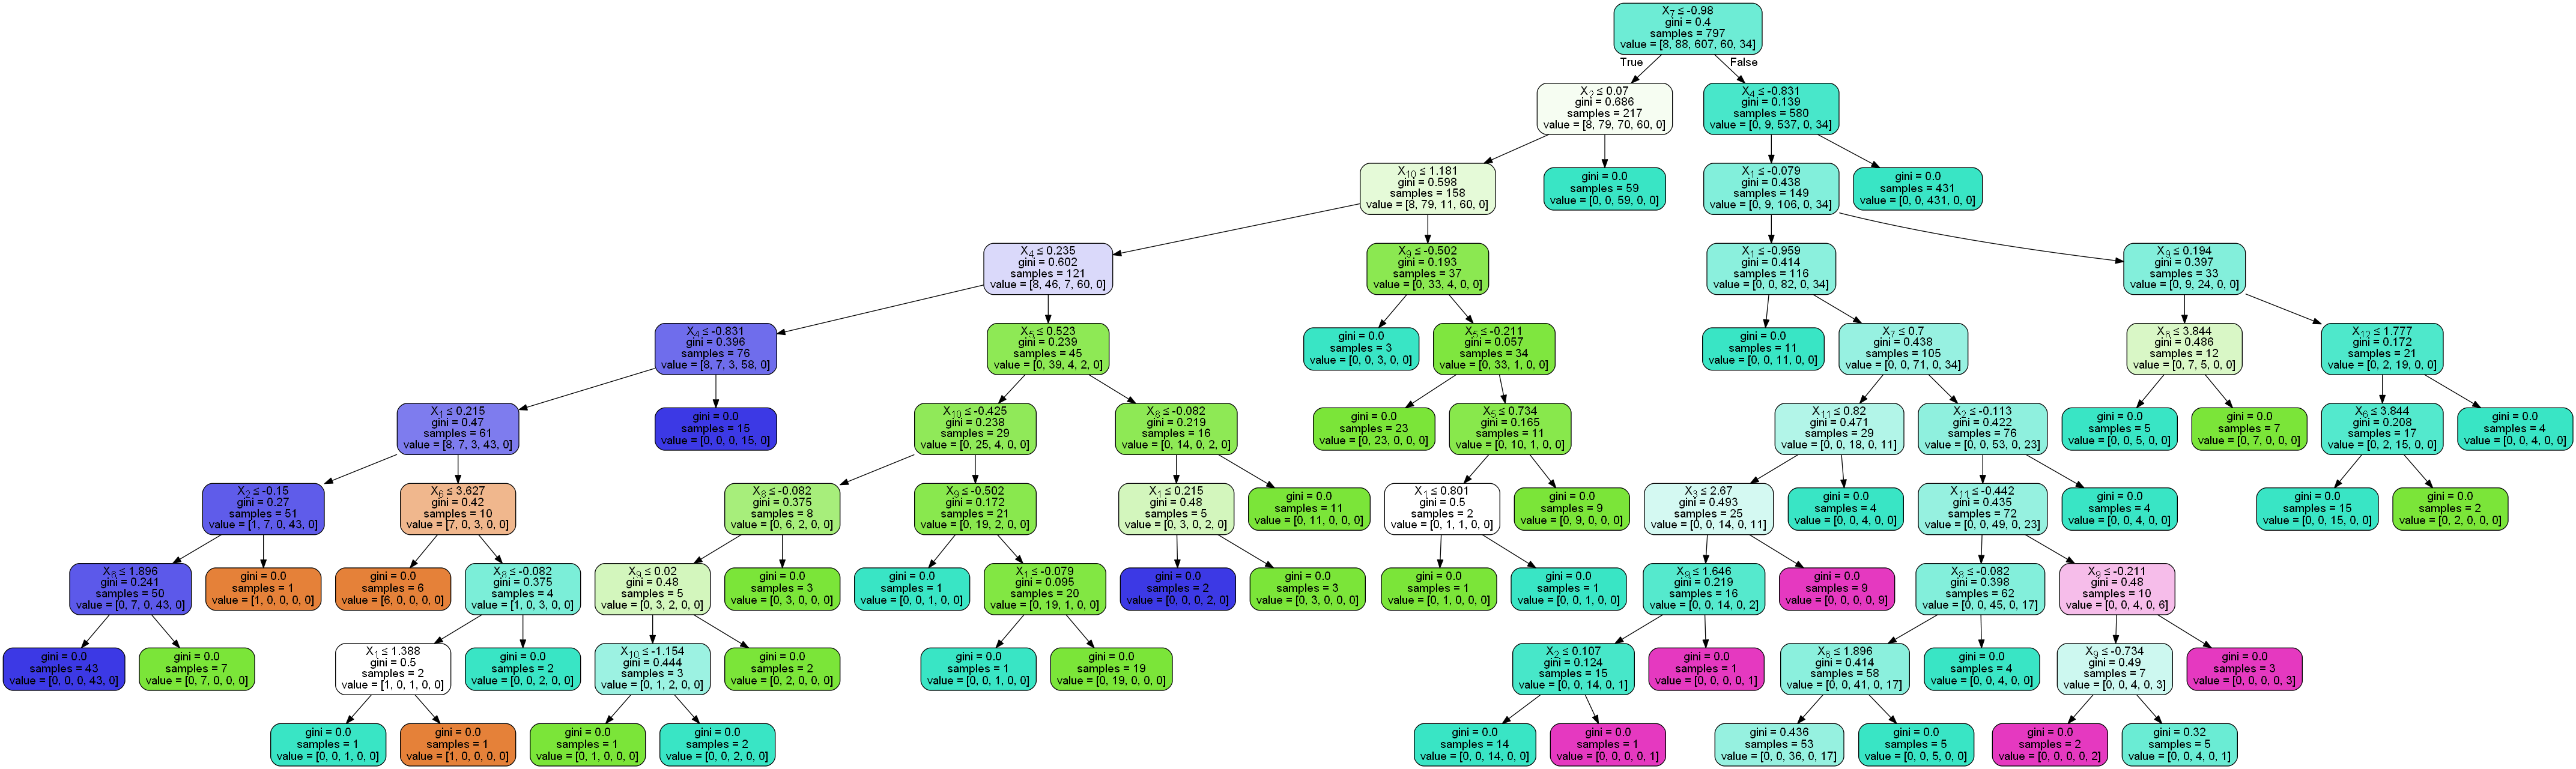

In [2]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())